# Naive Bayes Classifier

In statistics, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (see Bayes classifier). They are among the simplest Bayesian network models, but coupled with kernel density estimation, they can achieve higher accuracy levels.

Naïve Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features/predictors) in a learning problem. Maximum-likelihood training can be done by evaluating a closed-form expression, which takes linear time, rather than by expensive iterative approximation as used for many other types of classifiers.


<h3 align="center">

    Bayes Theorem:   P(A|B) = P(B|A) P(A) / P(B) 
    
</h3>

### Loading the dataset.


We will be using the Iris dataset, which is used for multiclass classification.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

data = load_iris()

In [2]:
x,y,cols = data['data'], data['target'], data['feature_names']

In [3]:
df = pd.DataFrame(x,columns=cols)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Splitting the data

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(df,y,random_state=78)

In [5]:
## Statistics for the Training set
means = X_train.groupby(y_train).apply(np.mean)
stds = X_train.groupby(y_train).apply(np.std)

In [6]:
## Prior Class probabilities
probs = X_train.groupby(y_train).apply(lambda x:len(x)) / X_train.shape[0]

In [7]:
means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.002500,3.392500,1.465000,0.245000
1,5.941176,2.758824,4.267647,1.320588
2,6.528947,2.923684,5.502632,1.986842


In [8]:
stds

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.347482,0.349562,0.186481,0.109430
1,0.526430,0.306899,0.463186,0.184358
2,0.621504,0.302128,0.539730,0.256670


In [9]:
probs

0    0.357143
1    0.303571
2    0.339286
dtype: float64

## Calculating labels for the Validation set

The final step is to calculate the probability for the Bayes' Theorem. For each element, we calculate the probability of it belonging to a class. Note: We can skip dividing by P(B) since it is a constant.

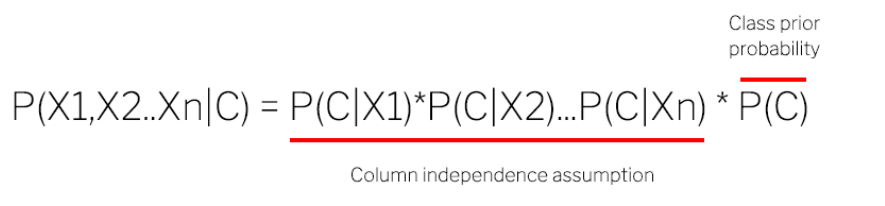

In [10]:
from scipy.stats import norm

y_pred = []

for i in range(X_val.shape[0]):
    p = {}
    
    # For each class
    for c in np.unique(y_train):
        
        # Prior prob. of a given class
        p[c] = probs.iloc[c]
        
        #For each col in the data
        
        for idx, param in enumerate(X_val.iloc[i]):
            
            '''
            Multiplying the probability of the given column value as belonging to the distribution 
            of the particular column(feature) for the given class
            '''
            p[c] *= norm.pdf(param, means.iloc[c,idx],stds.iloc[c,idx])
            
    y_pred.append(pd.Series(p).values.argmax())                    

### Verifying the equivalence of the custom Naive Bayes Classifier with sklearn

In [11]:
from sklearn.metrics import accuracy_score
acc_custom = accuracy_score(y_val,y_pred)

In [12]:
## Comparing with the sklearn Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

y_pred_NB = model.predict(X_val)
acc_sklearn = accuracy_score(y_val,y_pred_NB)

In [15]:
assert acc_custom == acc_sklearn